In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [64]:
data=pd.read_csv('heart.csv')

In [65]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [66]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [67]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [68]:
data.shape

(918, 12)

In [69]:
data.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [70]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [71]:

def cat_col(data):
    cat=data.select_dtypes(include='object')
    for c in cat:
        print("\nColumn:", c)
        print(data[c].value_counts())

In [72]:
cat_col(data)


Column: Sex
Sex
M    725
F    193
Name: count, dtype: int64

Column: ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Column: RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Column: ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Column: ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [73]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

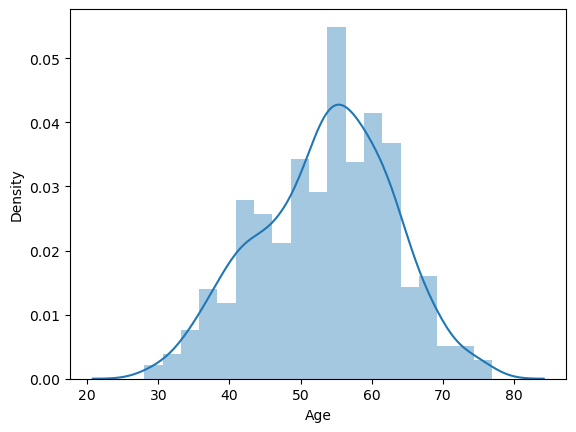

In [74]:
sns.distplot(data['Age'],kde=True)

In [75]:
def distplot(data):
    cols = data.select_dtypes(include='int64').columns
    for c in cols:
        sns.histplot(data[c], kde=True)
        plt.title(c)
        plt.show()

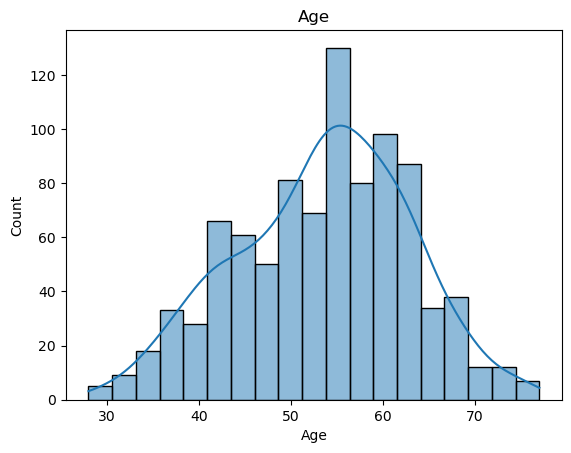

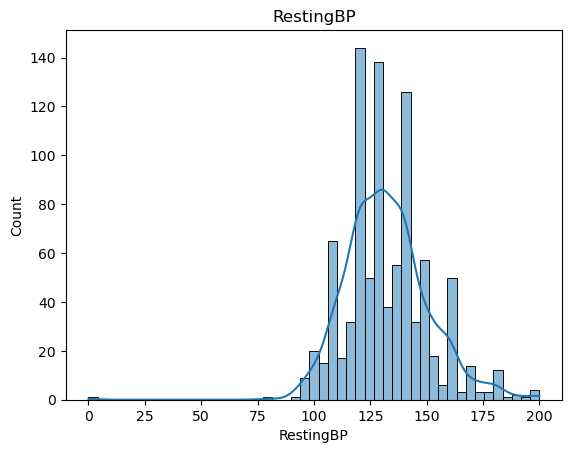

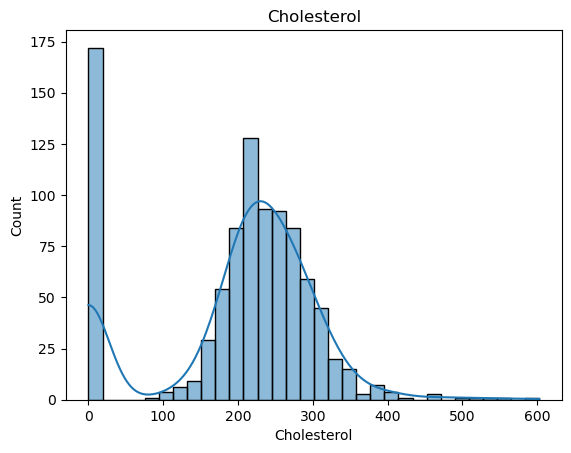

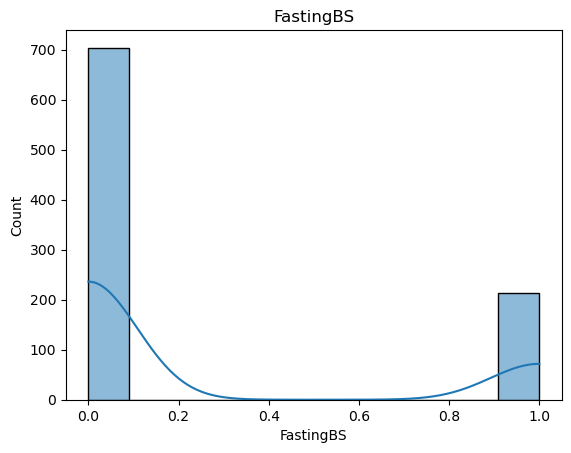

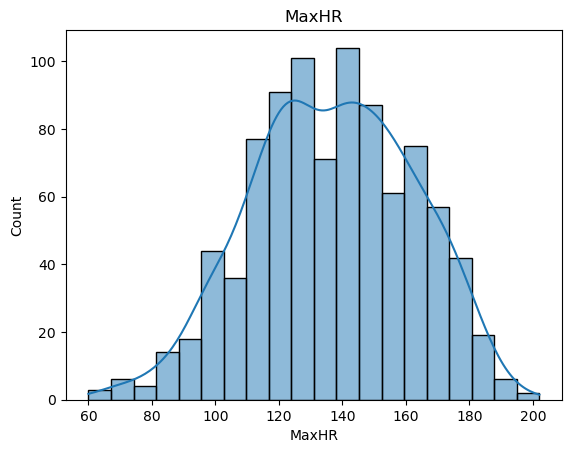

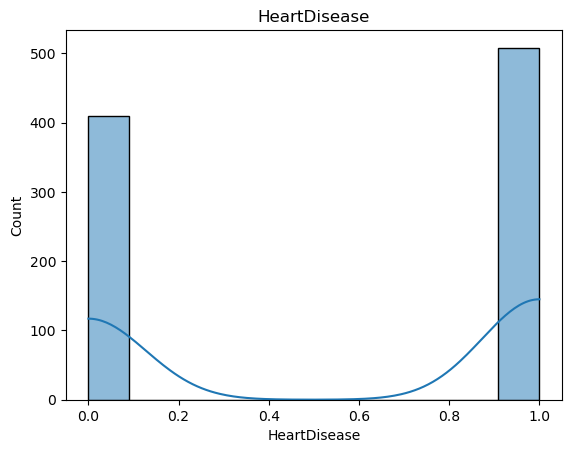

In [76]:
distplot(data)

In [12]:
def bplot(data):
    cols = data.select_dtypes(include='int64').columns
    for c in cols:
        sns.boxplot(x=data[c])
        plt.title(c)
        plt.show()

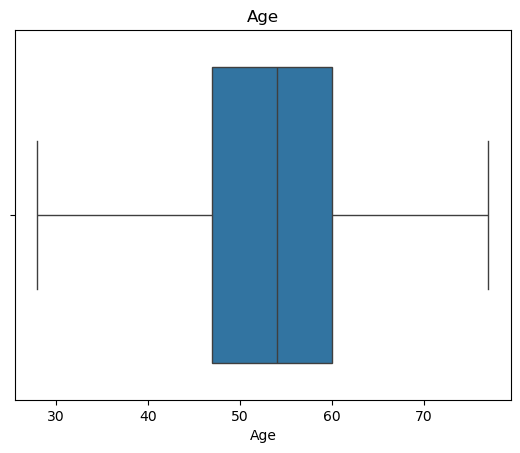

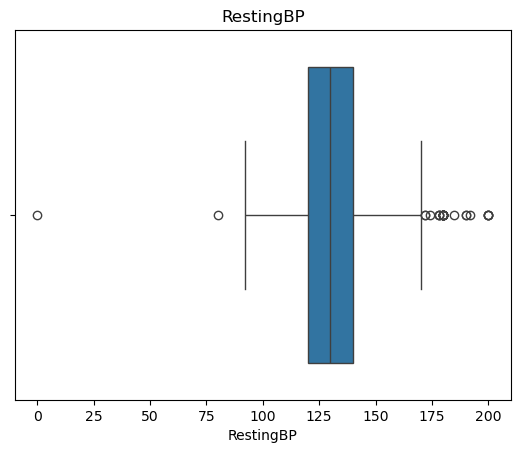

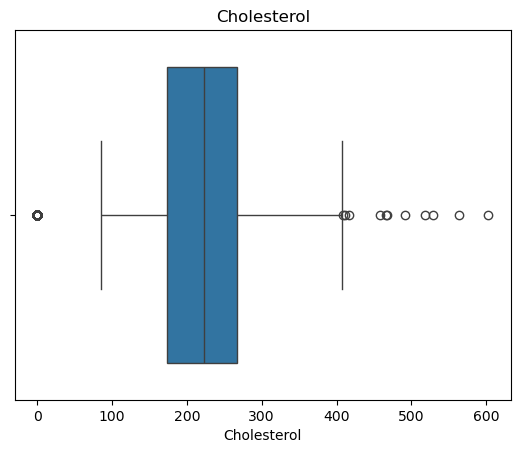

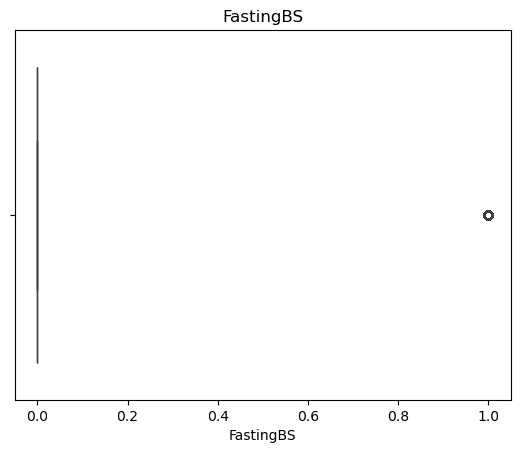

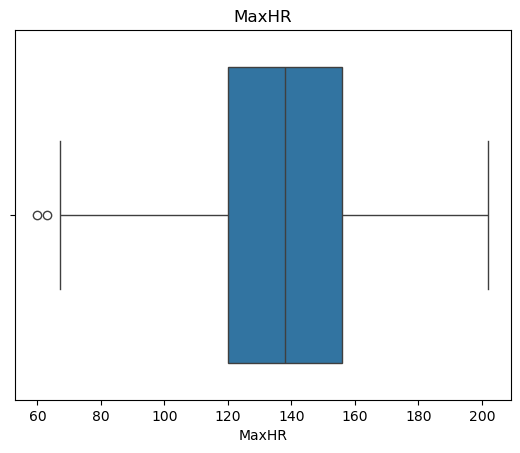

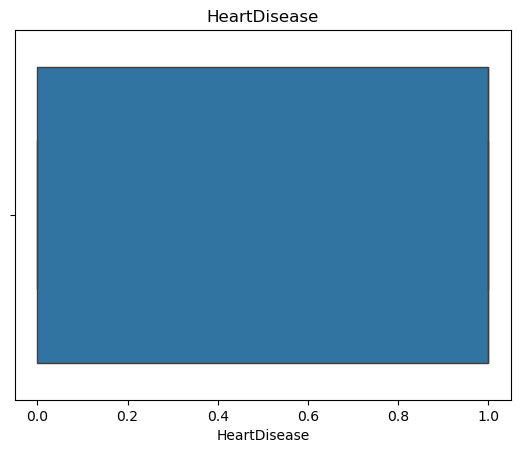

In [13]:
bplot(data)

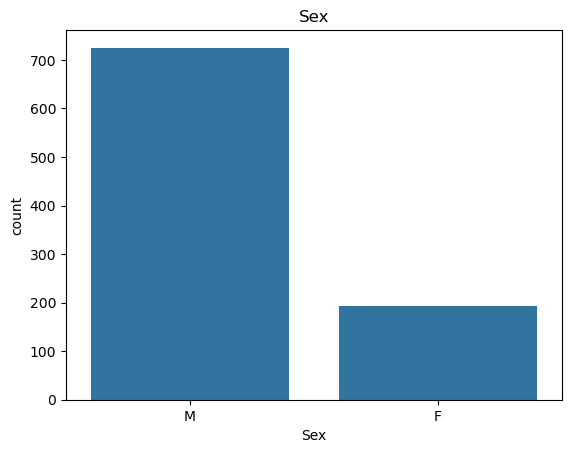

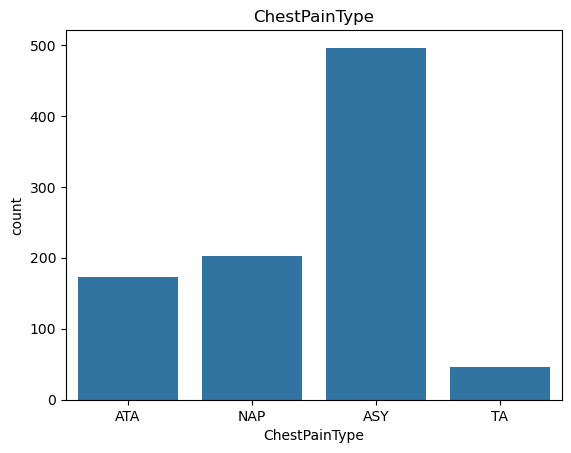

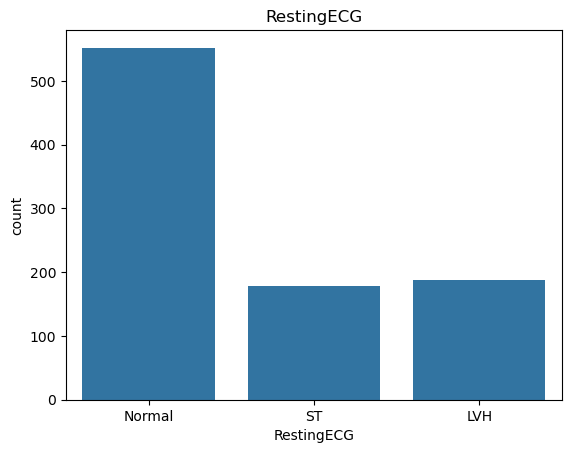

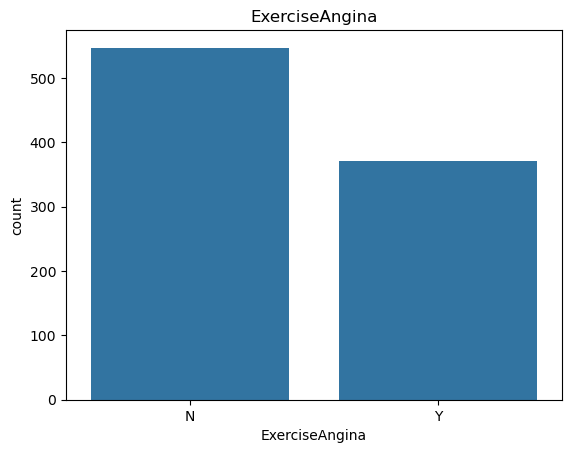

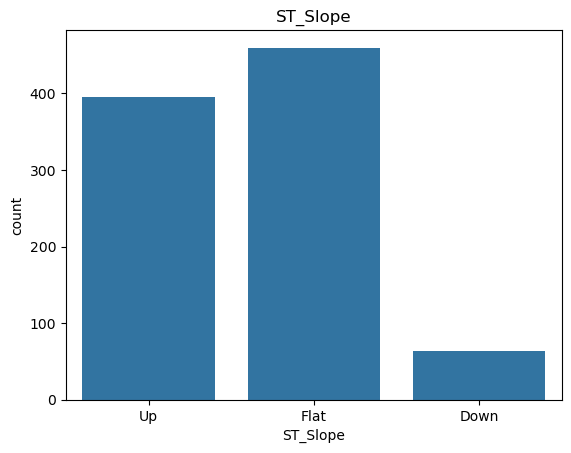

In [77]:
def cplot(data):
    col=data.select_dtypes('object').columns
    for c in col:
        sns.countplot(x=data[c])
        plt.title(c)
        plt.show()

cplot(data)

In [15]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


<Axes: >

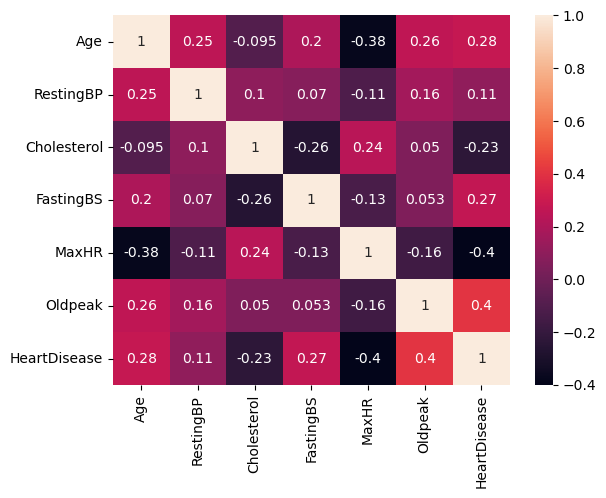

In [63]:
sns.heatmap(data.select_dtypes(include=['int64','float64']).corr(),annot=True)

In [78]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [79]:
data['HeartDisease'].value_counts(normalize=True) * 100

HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64

<Axes: xlabel='HeartDisease', ylabel='count'>

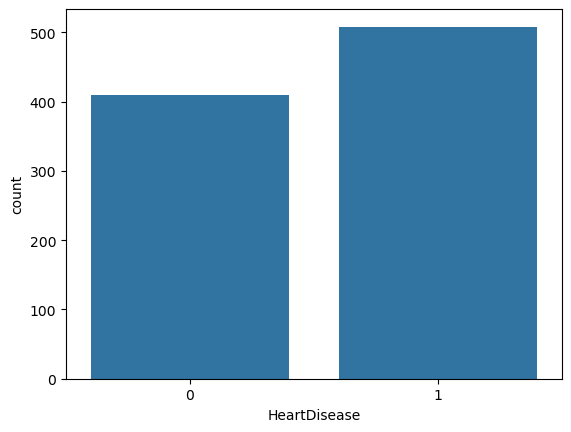

In [80]:
sns.countplot(x=data['HeartDisease'])

In [81]:
data.select_dtypes('int64').columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'HeartDisease'],
      dtype='object')

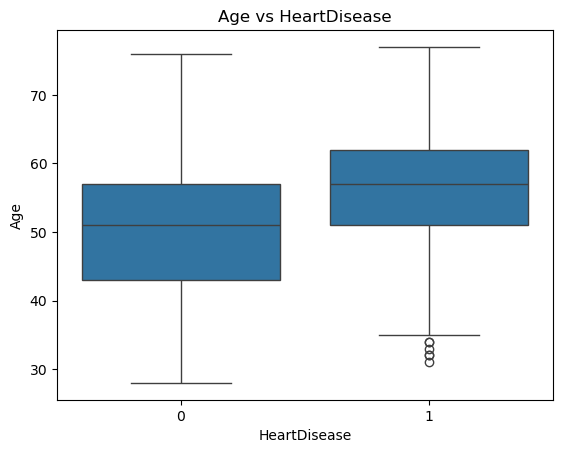

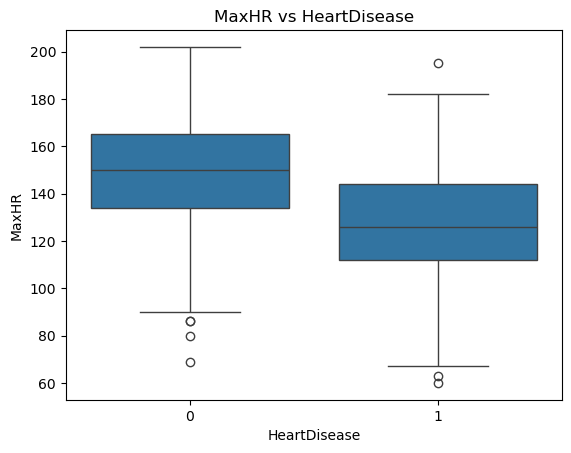

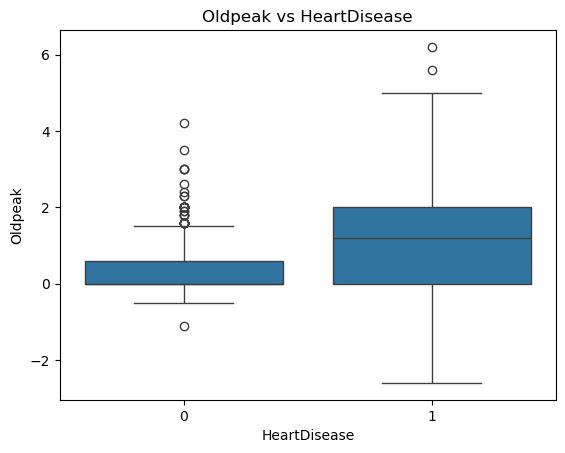

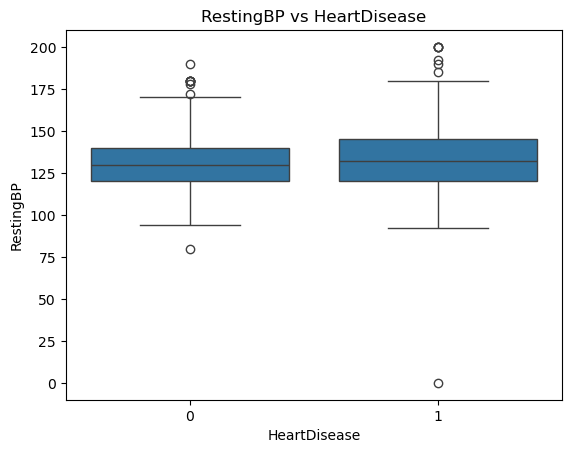

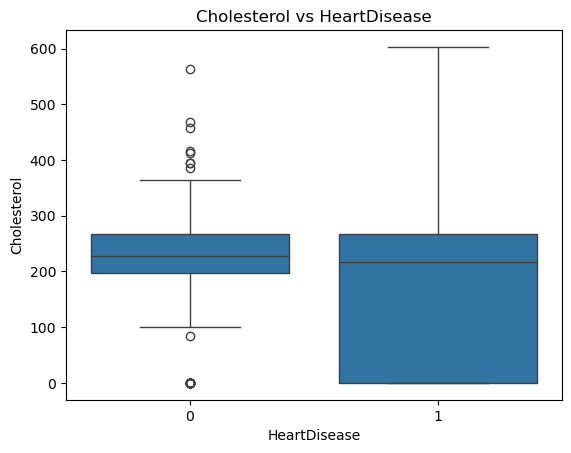

In [82]:
num_cols = ['Age','MaxHR','Oldpeak','RestingBP','Cholesterol']

for n in num_cols:
    sns.boxplot(x=data['HeartDisease'], y=data[n])
    plt.title(f"{n} vs HeartDisease")
    plt.show()


In [83]:
 data[(data['Cholesterol'] == 0) | (data['Cholesterol'] > 400)]



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


In [277]:
#data cleaning
df=data.copy()


In [278]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [279]:
d = df['Cholesterol'].mean()
df['Cholesterol'].replace(0, d, inplace=True)


In [280]:
median_chol = df['Cholesterol'].median()
df.loc[data['Cholesterol'] > 400, 'Cholesterol'] = median_chol


In [281]:

df[df['Cholesterol']>400].sum()


Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       0.0
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           0.0
ST_Slope            0
HeartDisease        0
dtype: object

In [282]:
r=data['RestingBP'].mean()

In [283]:
df['RestingBP'].replace(0, r, inplace=True)


In [284]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [285]:
df[df['RestingBP']==0].sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP         0.0
Cholesterol       0.0
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           0.0
ST_Slope            0
HeartDisease        0
dtype: object

In [286]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [287]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [288]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [289]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})


In [290]:
df.rename(columns={'Sex': 'ismale'}, inplace=True)


In [291]:
df

,Age,ismale,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [292]:

def cat_col(data):
    cat=data.select_dtypes(include='object')
    for c in cat:
        print("\nColumn:", c)
        print(data[c].value_counts())

In [293]:
 cat_col(data)


Column: Sex
Sex
M    725
F    193
Name: count, dtype: int64

Column: ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Column: RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Column: ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Column: ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [294]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})


In [295]:
df

,Age,ismale,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160.0,180.0,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150.0,195.0,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110.0,264.0,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144.0,193.0,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130.0,131.0,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130.0,236.0,0,LVH,174,0,0.0,Flat,1


In [296]:
df = pd.get_dummies(df, columns=['ST_Slope'])


In [297]:
df = pd.get_dummies(df, columns=['RestingECG'])


In [298]:
df

,Age,ismale,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,ATA,140.0,289.0,0,172,0,0.0,0,False,False,True,False,True,False
1,49,0,NAP,160.0,180.0,0,156,0,1.0,1,False,True,False,False,True,False
2,37,1,ATA,130.0,283.0,0,98,0,0.0,0,False,False,True,False,False,True
3,48,0,ASY,138.0,214.0,0,108,1,1.5,1,False,True,False,False,True,False
4,54,1,NAP,150.0,195.0,0,122,0,0.0,0,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110.0,264.0,0,132,0,1.2,1,False,True,False,False,True,False
914,68,1,ASY,144.0,193.0,1,141,0,3.4,1,False,True,False,False,True,False
915,57,1,ASY,130.0,131.0,0,115,1,1.2,1,False,True,False,False,True,False
916,57,0,ATA,130.0,236.0,0,174,0,0.0,1,False,True,False,True,False,False


In [299]:
df = pd.get_dummies(df, columns=['ChestPainType'])


In [300]:
df

,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140.0,289.0,0,172,0,0.0,0,False,False,True,False,True,False,False,True,False,False
1,49,0,160.0,180.0,0,156,0,1.0,1,False,True,False,False,True,False,False,False,True,False
2,37,1,130.0,283.0,0,98,0,0.0,0,False,False,True,False,False,True,False,True,False,False
3,48,0,138.0,214.0,0,108,1,1.5,1,False,True,False,False,True,False,True,False,False,False
4,54,1,150.0,195.0,0,122,0,0.0,0,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110.0,264.0,0,132,0,1.2,1,False,True,False,False,True,False,False,False,False,True
914,68,1,144.0,193.0,1,141,0,3.4,1,False,True,False,False,True,False,True,False,False,False
915,57,1,130.0,131.0,0,115,1,1.2,1,False,True,False,False,True,False,True,False,False,False
916,57,0,130.0,236.0,0,174,0,0.0,1,False,True,False,True,False,False,False,True,False,False


In [301]:
df

,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140.0,289.0,0,172,0,0.0,0,False,False,True,False,True,False,False,True,False,False
1,49,0,160.0,180.0,0,156,0,1.0,1,False,True,False,False,True,False,False,False,True,False
2,37,1,130.0,283.0,0,98,0,0.0,0,False,False,True,False,False,True,False,True,False,False
3,48,0,138.0,214.0,0,108,1,1.5,1,False,True,False,False,True,False,True,False,False,False
4,54,1,150.0,195.0,0,122,0,0.0,0,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110.0,264.0,0,132,0,1.2,1,False,True,False,False,True,False,False,False,False,True
914,68,1,144.0,193.0,1,141,0,3.4,1,False,True,False,False,True,False,True,False,False,False
915,57,1,130.0,131.0,0,115,1,1.2,1,False,True,False,False,True,False,True,False,False,False
916,57,0,130.0,236.0,0,174,0,0.0,1,False,True,False,True,False,False,False,True,False,False


In [302]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 30, 50, 70, 120],
                        labels=['Young', 'Middle', 'Senior', 'Old'],
                        right=False)


In [303]:
df

,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,AgeGroup
0,40,1,140.0,289.0,0,172,0,0.0,0,False,False,True,False,True,False,False,True,False,False,Middle
1,49,0,160.0,180.0,0,156,0,1.0,1,False,True,False,False,True,False,False,False,True,False,Middle
2,37,1,130.0,283.0,0,98,0,0.0,0,False,False,True,False,False,True,False,True,False,False,Middle
3,48,0,138.0,214.0,0,108,1,1.5,1,False,True,False,False,True,False,True,False,False,False,Middle
4,54,1,150.0,195.0,0,122,0,0.0,0,False,False,True,False,True,False,False,False,True,False,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110.0,264.0,0,132,0,1.2,1,False,True,False,False,True,False,False,False,False,True,Middle
914,68,1,144.0,193.0,1,141,0,3.4,1,False,True,False,False,True,False,True,False,False,False,Senior
915,57,1,130.0,131.0,0,115,1,1.2,1,False,True,False,False,True,False,True,False,False,False,Senior
916,57,0,130.0,236.0,0,174,0,0.0,1,False,True,False,True,False,False,False,True,False,False,Senior


In [304]:
df = pd.get_dummies(df, columns=['AgeGroup'])


In [305]:
df

,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,...,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,AgeGroup_Young,AgeGroup_Middle,AgeGroup_Senior,AgeGroup_Old
0,40,1,140.0,289.0,0,172,0,0.0,0,False,...,True,False,False,True,False,False,False,True,False,False
1,49,0,160.0,180.0,0,156,0,1.0,1,False,...,True,False,False,False,True,False,False,True,False,False
2,37,1,130.0,283.0,0,98,0,0.0,0,False,...,False,True,False,True,False,False,False,True,False,False
3,48,0,138.0,214.0,0,108,1,1.5,1,False,...,True,False,True,False,False,False,False,True,False,False
4,54,1,150.0,195.0,0,122,0,0.0,0,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110.0,264.0,0,132,0,1.2,1,False,...,True,False,False,False,False,True,False,True,False,False
914,68,1,144.0,193.0,1,141,0,3.4,1,False,...,True,False,True,False,False,False,False,False,True,False
915,57,1,130.0,131.0,0,115,1,1.2,1,False,...,True,False,True,False,False,False,False,False,True,False
916,57,0,130.0,236.0,0,174,0,0.0,1,False,...,False,False,False,True,False,False,False,False,True,False


In [306]:
df.drop(df.filter(like='OldpeakGroup').columns, axis=1, inplace=True)


In [307]:
df

,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,...,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,AgeGroup_Young,AgeGroup_Middle,AgeGroup_Senior,AgeGroup_Old
0,40,1,140.0,289.0,0,172,0,0.0,0,False,...,True,False,False,True,False,False,False,True,False,False
1,49,0,160.0,180.0,0,156,0,1.0,1,False,...,True,False,False,False,True,False,False,True,False,False
2,37,1,130.0,283.0,0,98,0,0.0,0,False,...,False,True,False,True,False,False,False,True,False,False
3,48,0,138.0,214.0,0,108,1,1.5,1,False,...,True,False,True,False,False,False,False,True,False,False
4,54,1,150.0,195.0,0,122,0,0.0,0,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110.0,264.0,0,132,0,1.2,1,False,...,True,False,False,False,False,True,False,True,False,False
914,68,1,144.0,193.0,1,141,0,3.4,1,False,...,True,False,True,False,False,False,False,False,True,False
915,57,1,130.0,131.0,0,115,1,1.2,1,False,...,True,False,True,False,False,False,False,False,True,False
916,57,0,130.0,236.0,0,174,0,0.0,1,False,...,False,False,False,True,False,False,False,False,True,False


In [308]:
df = df.astype(int)


In [309]:
df

,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,...,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,AgeGroup_Young,AgeGroup_Middle,AgeGroup_Senior,AgeGroup_Old
0,40,1,140,289,0,172,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
2,37,1,130,283,0,98,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,48,0,138,214,0,108,1,1,1,0,...,1,0,1,0,0,0,0,1,0,0
4,54,1,150,195,0,122,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
914,68,1,144,193,1,141,0,3,1,0,...,1,0,1,0,0,0,0,0,1,0
915,57,1,130,131,0,115,1,1,1,0,...,1,0,1,0,0,0,0,0,1,0
916,57,0,130,236,0,174,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [310]:
df.dtypes

Age                  int64
ismale               int64
RestingBP            int64
Cholesterol          int64
FastingBS            int64
MaxHR                int64
ExerciseAngina       int64
Oldpeak              int64
HeartDisease         int64
ST_Slope_Down        int64
ST_Slope_Flat        int64
ST_Slope_Up          int64
RestingECG_LVH       int64
RestingECG_Normal    int64
RestingECG_ST        int64
ChestPainType_ASY    int64
ChestPainType_ATA    int64
ChestPainType_NAP    int64
ChestPainType_TA     int64
AgeGroup_Young       int64
AgeGroup_Middle      int64
AgeGroup_Senior      int64
AgeGroup_Old         int64
dtype: object

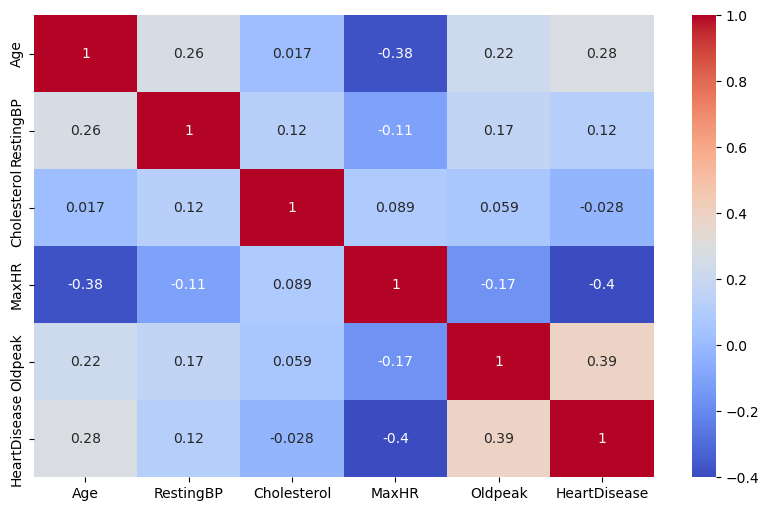

In [311]:
plt.figure(figsize=(10,6))
cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','HeartDisease']
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.show()


In [312]:
cat_cols = [col for col in df.columns 
            if df[col].nunique() <= 10 and df[col].dtype != 'float64']
cat_cols


['ismale',
 'FastingBS',
 'ExerciseAngina',
 'Oldpeak',
 'HeartDisease',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'AgeGroup_Young',
 'AgeGroup_Middle',
 'AgeGroup_Senior',
 'AgeGroup_Old']

In [313]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_cat = df[['ismale',
 'FastingBS',
 'ExerciseAngina',
 
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'AgeGroup_Young',
 'AgeGroup_Middle',
 'AgeGroup_Senior',
 'AgeGroup_Old']]  # + all dummy columns
y = df['HeartDisease']

scaler = MinMaxScaler()
X_cat_scaled = scaler.fit_transform(X_cat)

chi_scores = chi2(X_cat_scaled, y)
chi_scores
scores = pd.Series(chi_scores[0], index=X_cat.columns)
pvalues = pd.Series(chi_scores[1], index=X_cat.columns)

print("Chi-Square Scores:")
print(scores)
print("\nP-values:")
print(pvalues)



Chi-Square Scores:
ismale                18.006243
FastingBS             50.296983
ExerciseAngina       133.640134
ST_Slope_Down         12.835932
ST_Slope_Flat        140.635329
ST_Slope_Up          202.447182
RestingECG_LVH         0.083113
RestingECG_Normal      3.069601
RestingECG_ST          7.778755
ChestPainType_ASY    112.672269
ChestPainType_ATA    120.349494
ChestPainType_NAP     32.427756
ChestPainType_TA       2.617720
AgeGroup_Young         4.956098
AgeGroup_Middle       32.237400
AgeGroup_Senior       13.861989
AgeGroup_Old           3.064222
dtype: float64

P-values:
ismale               2.201817e-05
FastingBS            1.321526e-12
ExerciseAngina       6.549289e-31
ST_Slope_Down        3.400260e-04
ST_Slope_Flat        1.933233e-32
ST_Slope_Up          6.106858e-46
RestingECG_LVH       7.731226e-01
RestingECG_Normal    7.976903e-02
RestingECG_ST        5.286421e-03
ChestPainType_ASY    2.545580e-26
ChestPainType_ATA    5.304212e-28
ChestPainType_NAP    1.237068e-08
Che

In [314]:
print("\nFeature Selection Result:")
for col in X_cat.columns:
    if pvalues[col] < 0.05:
        print(f"{col}: ACCEPT (significant)")
    else:
        print(f"{col}: REJECT (not significant)")



Feature Selection Result:
ismale: ACCEPT (significant)
FastingBS: ACCEPT (significant)
ExerciseAngina: ACCEPT (significant)
ST_Slope_Down: ACCEPT (significant)
ST_Slope_Flat: ACCEPT (significant)
ST_Slope_Up: ACCEPT (significant)
RestingECG_LVH: REJECT (not significant)
RestingECG_Normal: REJECT (not significant)
RestingECG_ST: ACCEPT (significant)
ChestPainType_ASY: ACCEPT (significant)
ChestPainType_ATA: ACCEPT (significant)
ChestPainType_NAP: ACCEPT (significant)
ChestPainType_TA: REJECT (not significant)
AgeGroup_Young: ACCEPT (significant)
AgeGroup_Middle: ACCEPT (significant)
AgeGroup_Senior: ACCEPT (significant)
AgeGroup_Old: REJECT (not significant)


In [315]:
df.drop(['RestingECG_LVH', 'RestingECG_Normal', 'ChestPainType_TA','AgeGroup_Old'], axis=1, inplace=True)


In [316]:
df

,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,AgeGroup_Young,AgeGroup_Middle,AgeGroup_Senior
0,40,1,140,289,0,172,0,0,0,0,0,1,0,0,1,0,0,1,0
1,49,0,160,180,0,156,0,1,1,0,1,0,0,0,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,0,0,1,1,0,1,0,0,1,0
3,48,0,138,214,0,108,1,1,1,0,1,0,0,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1,1,0,1,0,0,0,0,0,0,1,0
914,68,1,144,193,1,141,0,3,1,0,1,0,0,1,0,0,0,0,1
915,57,1,130,131,0,115,1,1,1,0,1,0,0,1,0,0,0,0,1
916,57,0,130,236,0,174,0,0,1,0,1,0,0,0,1,0,0,0,1


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                918 non-null    int64
 1   ismale             918 non-null    int64
 2   RestingBP          918 non-null    int64
 3   Cholesterol        918 non-null    int64
 4   FastingBS          918 non-null    int64
 5   MaxHR              918 non-null    int64
 6   ExerciseAngina     918 non-null    int64
 7   Oldpeak            918 non-null    int64
 8   HeartDisease       918 non-null    int64
 9   ST_Slope_Down      918 non-null    int64
 10  ST_Slope_Flat      918 non-null    int64
 11  ST_Slope_Up        918 non-null    int64
 12  RestingECG_ST      918 non-null    int64
 13  ChestPainType_ASY  918 non-null    int64
 14  ChestPainType_ATA  918 non-null    int64
 15  ChestPainType_NAP  918 non-null    int64
 16  AgeGroup_Young     918 non-null    int64
 17  AgeGroup_Middle 

In [318]:
final_data=df

In [319]:
final_data

,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,AgeGroup_Young,AgeGroup_Middle,AgeGroup_Senior
0,40,1,140,289,0,172,0,0,0,0,0,1,0,0,1,0,0,1,0
1,49,0,160,180,0,156,0,1,1,0,1,0,0,0,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,0,0,1,1,0,1,0,0,1,0
3,48,0,138,214,0,108,1,1,1,0,1,0,0,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1,1,0,1,0,0,0,0,0,0,1,0
914,68,1,144,193,1,141,0,3,1,0,1,0,0,1,0,0,0,0,1
915,57,1,130,131,0,115,1,1,1,0,1,0,0,1,0,0,0,0,1
916,57,0,130,236,0,174,0,0,1,0,1,0,0,0,1,0,0,0,1


In [320]:
final_data = df.copy()
final_data.to_csv('final_data.csv', index=False)


In [321]:
final_data

,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,AgeGroup_Young,AgeGroup_Middle,AgeGroup_Senior
0,40,1,140,289,0,172,0,0,0,0,0,1,0,0,1,0,0,1,0
1,49,0,160,180,0,156,0,1,1,0,1,0,0,0,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,0,0,1,1,0,1,0,0,1,0
3,48,0,138,214,0,108,1,1,1,0,1,0,0,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1,1,0,1,0,0,0,0,0,0,1,0
914,68,1,144,193,1,141,0,3,1,0,1,0,0,1,0,0,0,0,1
915,57,1,130,131,0,115,1,1,1,0,1,0,0,1,0,0,0,0,1
916,57,0,130,236,0,174,0,0,1,0,1,0,0,0,1,0,0,0,1


In [322]:
# Scaling
from sklearn.preprocessing import StandardScaler

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB   # or MultinomialNB, BernoulliNB

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score


In [323]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}


In [324]:
x=final_data.drop('HeartDisease',axis=1)

In [325]:
y=final_data['HeartDisease']

In [326]:
x

,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,AgeGroup_Young,AgeGroup_Middle,AgeGroup_Senior
0,40,1,140,289,0,172,0,0,0,0,1,0,0,1,0,0,1,0
1,49,0,160,180,0,156,0,1,0,1,0,0,0,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,0,1,1,0,1,0,0,1,0
3,48,0,138,214,0,108,1,1,0,1,0,0,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1,0,1,0,0,0,0,0,0,1,0
914,68,1,144,193,1,141,0,3,0,1,0,0,1,0,0,0,0,1
915,57,1,130,131,0,115,1,1,0,1,0,0,1,0,0,0,0,1
916,57,0,130,236,0,174,0,0,0,1,0,0,0,1,0,0,0,1


In [327]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [328]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standard Scaler
scaler = StandardScaler()

# केवल training data पर fit करें और transform करें
x_train = scaler.fit_transform(x_train)

# Test data पर सिर्फ transform करें (fit नहीं)
x_test = scaler.transform(x_test)


In [329]:
results=[]

In [330]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    results.append({
    "Model":name,
    "accuracy":round(acc,4),
    "f1_score":round(f1,4)})

In [331]:
results

[{'Model': 'Logistic Regression', 'accuracy': 0.8696, 'f1_score': 0.8846},
 {'Model': 'KNN', 'accuracy': 0.8587, 'f1_score': 0.8725},
 {'Model': 'Naive Bayes', 'accuracy': 0.7935, 'f1_score': 0.8468},
 {'Model': 'Decision Tree', 'accuracy': 0.7935, 'f1_score': 0.8081},
 {'Model': 'SVM', 'accuracy': 0.8533, 'f1_score': 0.8696}]

In [332]:
import joblib
joblib.dump(models['Logistic Regression'],"Logistic_heart.pkl")
joblib.dump(scaler,"scaler1.pkl")
joblib.dump(x.columns.tolist(),"columns.pkl")

['columns.pkl']

In [ ]:
##checking model
# maan lo X tumhara features ka dataframe hai
i = 0   # koi bhi index le lo jisme heart_disease = 1 ya 0 ho

x_row = X.iloc[[i]]
y_row = y.iloc[i]

print("Row features:\n", x_row)
print("Actual label:", y_row)

x_scaled = scaler.transform(x_row)
proba = model.predict_proba(x_scaled)[0][1]
pred  = model.predict(x_scaled)[0]

print("Model probability:", proba)
print("Model prediction:", pred)


x_row

In [334]:
x_row


,Age,ismale,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,AgeGroup_Young,AgeGroup_Middle,AgeGroup_Senior
0,40,1,140,289,0,172,0,0,0,0,1,0,0,1,0,0,1,0


In [335]:
y_row

np.int64(0)

In [336]:
proba

NameError: name 'proba' is not defined